In [1]:
#

In [2]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.backend as K

from sificc_lib import AI, utils, Event, Simulation, root_files, DataModel

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:,.3f}'.format

%matplotlib inline

In [3]:
model_name = 'model-2a-lsf'
shuffle_clusters = False

data = DataModel('data-mtx-enough-top-6.npz', 
                 batch_size = 64, validation_percent = .05, test_percent = .1)
data.append_dim = True

ai = AI(data, model_name)

np.random.seed(888)
ai.data.shuffle(only_train=False)

if shuffle_clusters:
    ai.data.shuffle_training_clusters()

ai.data.weight_non_compton = .5
ai.weight_type = .05
ai.weight_e_cluster = .8
ai.weight_p_cluster = .8
ai.weight_pos_x = 12
ai.weight_pos_y = 2
ai.weight_pos_z = 8
ai.weight_energy = 5

In [4]:
ai.create_model(conv_layers=[128, 64], classifier_layers=[32], type_layers=[8], 
                pos_layers=[64], energy_layers=[32], base_l2=.000, limbs_l2=.000)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 54, 1)]      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 6, 128)       1280        inputs[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 6, 64)        8256        conv_1[0][0]                     
__________________________________________________________________________________________________
flatting (Flatten)              (None, 384)          0           conv_2[0][0]                     
______________________________________________________________________________________________

In [5]:
ai.compile_model(learning_rate=0.0003)

In [6]:
%%time
ai.train(epochs=100, shuffle=True, shuffle_clusters=shuffle_clusters, verbose=0)
ai.model.evaluate(ai.data.train_x, ai.data.train_y, verbose=1)
print()

17443/17443 [==============================] - 28s 2ms/step - loss: 0.4135 - e_cluster_loss: 0.0282 - p_cluster_loss: 0.0740 - type_loss: 0.2942 - pos_x_loss: 6.0894e-04 - pos_y_loss: 0.0382 - pos_z_loss: 6.4527e-04 - energy_loss: 0.0456 - e_cluster__cluster_accuracy: 0.9597 - p_cluster__cluster_accuracy: 0.8946 - type__type_accuracy: 0.8747 - type__type_tp_rate: 0.8690

CPU times: user 1d 2h 42min 11s, sys: 16min 37s, total: 1d 2h 58min 49s
Wall time: 1d 3h 3min 19s


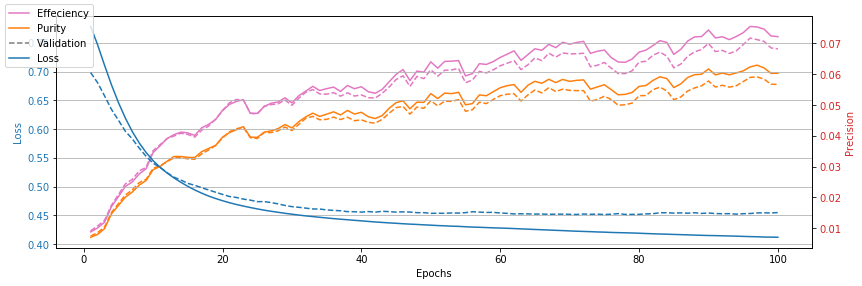

AI model
  Loss:        0.46274
    -Type:         0.29980 *  0.05 = 0.01499
    -Pos X:        0.00082 * 12.00 = 0.00981
    -Pos Y:        0.03856 *  2.00 = 0.07712
    -Pos Z:        0.00073 *  8.00 = 0.00582
    -Energy:       0.05155 *  5.00 = 0.25777
    -Cls e:        0.03666 *  0.80 = 0.02933
    -Cls p:        0.08486 *  0.80 = 0.06789
  Accuracy:    0.87339
    -TP rate:      0.86983
    -Cls e rate:   0.95073
    -Cls p rate:   0.88657
  Efficiency:  0.06964
  Purity:      0.05915
  Euc mean:   11.97819
  Euc std:    30.87458

Reco
  Accuracy:    0.64592
    -TP rate:      0.74924
  Efficiency:  0.10264
  Purity:      0.05959
  Euc mean:   20.44427
  Euc std:    48.46802


In [7]:
ai.plot_training_loss(smooth=True)
ai.evaluate()

In [8]:
ai.save(file_name=model_name)